In [2]:
from scipy.io import loadmat
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

# Exercise 5: Clustering
This assignment is based on the previously generated 2-dimensional data of the three classes (5, 6 and 8) from the MNIST database of handwritten digits. 

First, mix the 2-dimensional data (training data only) by removing the labels and then use one Gaussian mixture model to model them. 

Secondly, compare the Gaussian mixture model with the Gaussian models trained in the previous assignment, in terms of mean and variance values as well as through visualisation.

## Loading the data and mixing
First we load the exercise data set, combine the individual training sets into one and shuffle the data to ensure a random shuffle (here with a seed to ensure reproducability). 

In [3]:
data_path = "2D568class.mat"
data = loadmat(data_path)
train5 = data["trn5_2dim"]/255
train6 = data["trn6_2dim"]/255
train8 = data["trn8_2dim"]/255

trainset = np.concatenate([train5, train6, train8])
np.random.seed(0)
np.random.shuffle(trainset)

## Creating a Gaussian Mixture model
First create a Gaussian Mixture Model of the data using sklearn

In [4]:
gModel = GMM(n_components = 3).fit(trainset)

## Creating Gaussian models
Following the same approach from the previous exercises we can also estimate Gaussian models for each class

In [5]:
# 5 statistics
mean5 = np.mean(train5, axis=0)
print(mean5)
cov5 = np.cov(train5, rowvar=False)
print(cov5)

# 6 statistics
mean6 = np.mean(train6, axis=0)
print(mean6)
cov6 = np.cov(train6, rowvar=False)
print(cov6)

# 8 statistics
mean8 = np.mean(train8, axis=0)
print(mean8)
cov8 = np.cov(train8, rowvar=False)
print(cov8)

[-1.09629628 -0.35037072]
[[ 1.79409703 -0.79112534]
 [-0.79112534  6.29247315]]
[2.60384024 0.86074213]
[[ 2.74853033 -1.87168656]
 [-1.87168656  3.09008399]]
[-1.61901038 -0.54586145]
[[ 1.51310487 -0.88278306]
 [-0.88278306  3.43018827]]


## Comparing means and covariance matrices.
Let's look at the means and covariance matrices.

First we extract the means and covariances from the GMM.

In [6]:
means = gModel.means_
mean1_gmm = means[0]
mean2_gmm = means[1]
mean3_gmm = means[2]

covs = gModel.covariances_
cov1_gmm = covs[0]
cov2_gmm = covs[1]
cov3_gmm = covs[2]

Now we can compare the GMM means and covariances to the Gaussin models estimated for each class individually.

### Means

In [7]:

for name, mean in {"mean5": mean5, "mean6": mean6, "mean8": mean8, 
                   "mean1_gmm": mean1_gmm, "mean2_gmm": mean2_gmm, "mean3_gmm": mean3_gmm}.items():
    print(f"{name}: {np.array2string(mean)}")

mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]
mean1_gmm: [-1.00261972 -2.06286597]
mean2_gmm: [3.10749821 0.52284066]
mean3_gmm: [-1.43832858  1.61367239]


The answers that was left there?
mean5: [-1.09629628 -0.35037072]
mean6: [2.60384024 0.86074213]
mean8: [-1.61901038 -0.54586145]
mean1_gmm: [-1.00261972 -2.06286597]
mean2_gmm: [3.10749821 0.52284066]
mean3_gmm: [-1.43832858  1.61367239]

### Covariances

Text(0.5, 1.0, 'Cov. GMM kernel 3')

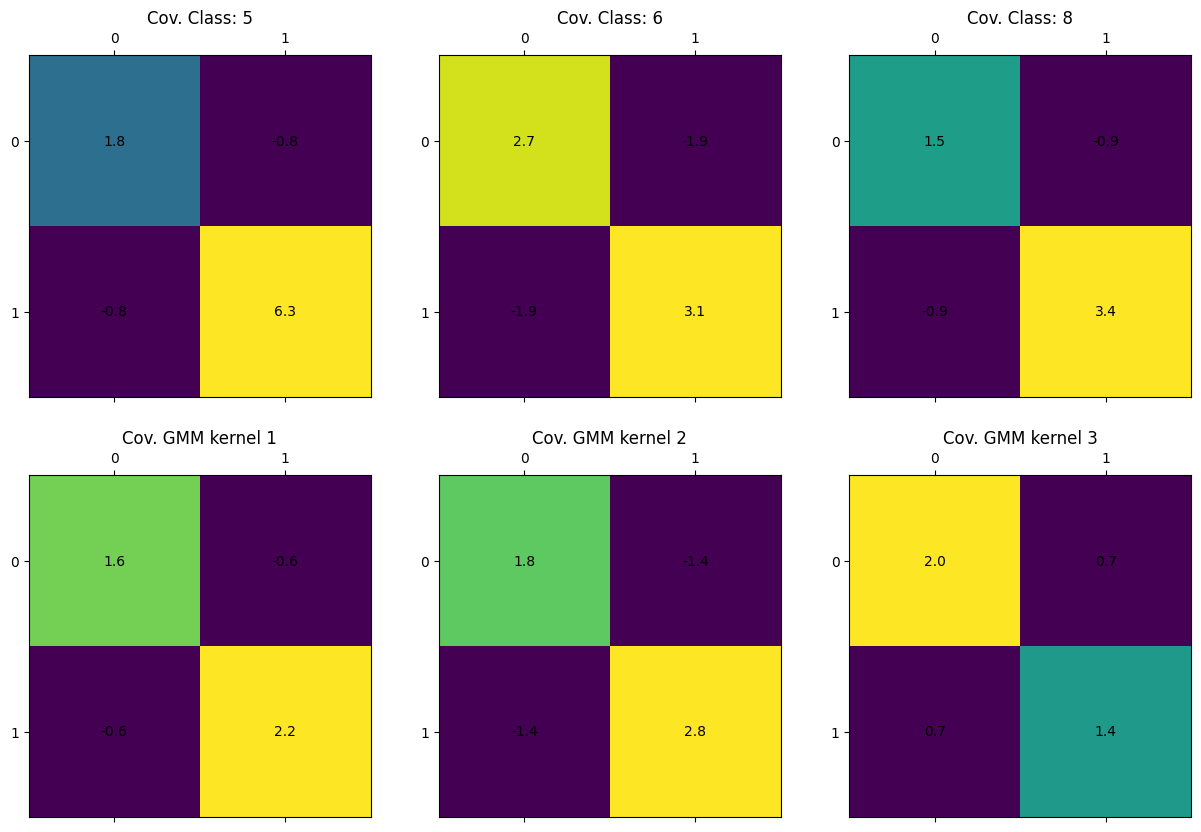

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].matshow(cov5)
for (i, j), z in np.ndenumerate(cov5):
    axs[0, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 0].set_title("Cov. Class: 5")

axs[1, 0].matshow(cov1_gmm)
for (i, j), z in np.ndenumerate(cov1_gmm):
    axs[1, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 0].set_title("Cov. GMM kernel 1")

axs[0, 1].matshow(cov6)
for (i, j), z in np.ndenumerate(cov6):
    axs[0, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 1].set_title("Cov. Class: 6")

axs[1, 1].matshow(cov2_gmm)
for (i, j), z in np.ndenumerate(cov2_gmm):
    axs[1, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 1].set_title("Cov. GMM kernel 2")

axs[0, 2].matshow(cov8)
for (i, j), z in np.ndenumerate(cov8):
    axs[0, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 2].set_title("Cov. Class: 8")

c = axs[1, 2].matshow(cov3_gmm)
for (i, j), z in np.ndenumerate(cov3_gmm):
    axs[1, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 2].set_title("Cov. GMM kernel 3")

What do we see when comparing means and covariances?

Covariances are lower in most cases

## Visualizing the models in contourplots.
Now we would like to visualize our models to compare them.

We first generate some points to be able to sample from the models.

In [9]:
#Create points to do a contour a plot



We can also visualize the separate Gaussian models from the GMM by creating Gassians from the classwise means and covariances of the GMM model.

Now we sample from the models using the generated points.

The model samples can then be visualized in a contour plot.

In [10]:
#Plot contours for the GMM, seperated GMM and individual estimated densities
